In [83]:
#!pip install shap

In [84]:
#pip install --upgrade pip


In [85]:
#!pip install toad

In [86]:
import toad

In [87]:
import pandas as pd
import numpy as np
import shap
#import shapely
from sklearn.model_selection import train_test_split

In [88]:
account = pd.read_csv(r"C:\Users\dmariru\OneDrive - KPMG\Documents\Data\frm\lpetrocelli-czech-financial-dataset-real-anonymized-transactions\lpetrocelli-czech-financial-dataset-real-anonymized-transactions\account.csv", sep = ';')
card = pd.read_csv(r"C:\Users\dmariru\OneDrive - KPMG\Documents\Data\frm\lpetrocelli-czech-financial-dataset-real-anonymized-transactions\lpetrocelli-czech-financial-dataset-real-anonymized-transactions\card.csv", sep = ';')
client = pd.read_csv(r"C:\Users\dmariru\OneDrive - KPMG\Documents\Data\frm\lpetrocelli-czech-financial-dataset-real-anonymized-transactions\lpetrocelli-czech-financial-dataset-real-anonymized-transactions\client.csv",sep = ';')
disp = pd.read_csv(r"C:\Users\dmariru\OneDrive - KPMG\Documents\Data\frm\lpetrocelli-czech-financial-dataset-real-anonymized-transactions\lpetrocelli-czech-financial-dataset-real-anonymized-transactions\disp.csv", sep = ';')
district = pd.read_csv(r"C:\Users\dmariru\OneDrive - KPMG\Documents\Data\frm\lpetrocelli-czech-financial-dataset-real-anonymized-transactions\lpetrocelli-czech-financial-dataset-real-anonymized-transactions\district.csv", sep = ';')
loan = pd.read_csv(r"C:\Users\dmariru\OneDrive - KPMG\Documents\Data\frm\lpetrocelli-czech-financial-dataset-real-anonymized-transactions\lpetrocelli-czech-financial-dataset-real-anonymized-transactions\loan.csv", sep = ';')
order = pd.read_csv(r"C:\Users\dmariru\OneDrive - KPMG\Documents\Data\frm\lpetrocelli-czech-financial-dataset-real-anonymized-transactions\lpetrocelli-czech-financial-dataset-real-anonymized-transactions\order.csv", sep = ';')
trans = pd.read_csv(r"C:\Users\dmariru\OneDrive - KPMG\Documents\Data\frm\lpetrocelli-czech-financial-dataset-real-anonymized-transactions\lpetrocelli-czech-financial-dataset-real-anonymized-transactions\trans.csv", sep = ';')

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.


In [89]:
account.rename(columns = {'date': 'account_date'}, inplace=True)
card.rename(columns = {'type': 'card_type'}, inplace=True)
card.rename(columns = {'issued': 'issued_date'}, inplace=True)
disp.rename(columns = {'type': 'disposition_type'}, inplace=True)
loan.rename(columns = {'date': 'loan_date'}, inplace=True)
loan.rename(columns = {'amount': 'loan_amount'}, inplace=True)
loan.rename(columns = {'duration': 'loan_duration'}, inplace=True)
trans.rename(columns = {'date': 'trans_date'}, inplace=True)
trans.rename(columns = {'amount': 'trans_amount'}, inplace=True)
trans.rename(columns = {'type': 'trans_type'}, inplace=True)

In [90]:
account.columns

Index(['account_id', 'district_id', 'frequency', 'account_date'], dtype='object')

In [91]:
card.columns

Index(['card_id', 'disp_id', 'card_type', 'issued_date'], dtype='object')

In [92]:
client.columns

Index(['client_id', 'birth_number', 'district_id'], dtype='object')

In [93]:
disp.columns

Index(['disp_id', 'client_id', 'account_id', 'disposition_type'], dtype='object')

In [94]:
loan.columns

Index(['loan_id', 'account_id', 'loan_date', 'loan_amount', 'loan_duration',
       'payments', 'status'],
      dtype='object')

In [95]:
trans.columns

Index(['trans_id', 'account_id', 'trans_date', 'trans_type', 'operation',
       'trans_amount', 'balance', 'k_symbol', 'bank', 'account'],
      dtype='object')

In [96]:
loan = pd.merge(loan , trans, how='left', left_on='account_id', right_on='account_id')
loan = pd.merge(loan, order ,how = 'left' ,left_on = 'account_id' , right_on ='account_id')
loan = pd.merge(loan , account, how='left', left_on='account_id', right_on='account_id')
#loan = pd.merge(loan, district ,how = 'left' ,left_on = 'district_id' , right_on ='district_id')
loan = pd.merge(loan , disp, how='left', left_on='account_id', right_on='account_id')
loan = pd.merge(loan, card ,how = 'left' ,left_on = 'disp_id' , right_on ='disp_id')

for col in loan:
    if col.endswith('_x'):
        loan.rename(columns = lambda col:col.rstrip('_x'),inplace=True)
    elif col.endswith('_y'):
        to_drop = [col for col in loan if col.endswith('_y')]
        loan.drop(to_drop,axis=1,inplace=True)
    else: 
        pass 

In [97]:
loan.head()

,loan_id,account_id,loan_date,loan_amount,loan_duration,payments,status,trans_id,trans_date,trans_type,...,amount,district_id,frequency,account_date,disp_id,client_id,disposition_type,card_id,card_type,issued_date
0,5314,1787,930705,96396,12,8033.0,B,523621,930322,PRIJEM,...,8033.2,30,POPLATEK TYDNE,930322,2166,2166,OWNER,NaN,NaN,NaN
1,5314,1787,930705,96396,12,8033.0,B,524054,930421,PRIJEM,...,8033.2,30,POPLATEK TYDNE,930322,2166,2166,OWNER,NaN,NaN,NaN
2,5314,1787,930705,96396,12,8033.0,B,524055,930521,PRIJEM,...,8033.2,30,POPLATEK TYDNE,930322,2166,2166,OWNER,NaN,NaN,NaN
3,5314,1787,930705,96396,12,8033.0,B,524056,930620,PRIJEM,...,8033.2,30,POPLATEK TYDNE,930322,2166,2166,OWNER,NaN,NaN,NaN
4,5314,1787,930705,96396,12,8033.0,B,523624,930708,PRIJEM,...,8033.2,30,POPLATEK TYDNE,930322,2166,2166,OWNER,NaN,NaN,NaN


In [98]:
loan = loan.drop(['loan_id','account_id','trans_id','order_id','client_id','card_id'],axis = 1)

In [99]:
loan[:1]

,loan_date,loan_amount,loan_duration,payments,status,trans_date,trans_type,operation,trans_amount,balance,...,bank_to,account_to,amount,district_id,frequency,account_date,disp_id,disposition_type,card_type,issued_date
0,930705,96396,12,8033.0,B,930322,PRIJEM,VKLAD,1100.0,1100.0,...,EF,8468449,8033.2,30,POPLATEK TYDNE,930322,2166,OWNER,NaN,NaN


In [100]:
loan.columns

Index(['loan_date', 'loan_amount', 'loan_duration', 'payments', 'status',
       'trans_date', 'trans_type', 'operation', 'trans_amount', 'balance',
       'k_symbol', 'bank', 'account', 'bank_to', 'account_to', 'amount',
       'district_id', 'frequency', 'account_date', 'disp_id',
       'disposition_type', 'card_type', 'issued_date'],
      dtype='object')

In [101]:
data = loan.copy()

In [102]:
#data = df['amount','status',]

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552017 entries, 0 to 552016
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_date         552017 non-null  int64  
 1   loan_amount       552017 non-null  int64  
 2   loan_duration     552017 non-null  int64  
 3   payments          552017 non-null  float64
 4   status            552017 non-null  object 
 5   trans_date        552017 non-null  int64  
 6   trans_type        552017 non-null  object 
 7   operation         468062 non-null  object 
 8   trans_amount      552017 non-null  float64
 9   balance           552017 non-null  float64
 10  k_symbol          307269 non-null  object 
 11  bank              179512 non-null  object 
 12  account           211409 non-null  float64
 13  bank_to           552017 non-null  object 
 14  account_to        552017 non-null  int64  
 15  amount            552017 non-null  float64
 16  district_id       55

In [104]:
from sklearn.preprocessing import LabelEncoder
#data = data.apply(LabelEncoder().fit_transform)

In [105]:
data = data.sample(n=10000)
data.shape

(10000, 23)

In [106]:
data.columns

Index(['loan_date', 'loan_amount', 'loan_duration', 'payments', 'status',
       'trans_date', 'trans_type', 'operation', 'trans_amount', 'balance',
       'k_symbol', 'bank', 'account', 'bank_to', 'account_to', 'amount',
       'district_id', 'frequency', 'account_date', 'disp_id',
       'disposition_type', 'card_type', 'issued_date'],
      dtype='object')

In [107]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['status'] = labelencoder.fit_transform(data['status'])

In [108]:
data.head()

,loan_date,loan_amount,loan_duration,payments,status,trans_date,trans_type,operation,trans_amount,balance,...,bank_to,account_to,amount,district_id,frequency,account_date,disp_id,disposition_type,card_type,issued_date
192076,950329,185952,48,3874.0,2,960725,VYDAJ,VYBER,29300.0,85106.4,...,ST,68287300,4625.0,34,POPLATEK MESICNE,940319,2700,OWNER,NaN,NaN
189621,950321,15420,12,1285.0,0,970810,VYDAJ,PREVOD NA UCET,1455.0,54312.2,...,IJ,63995122,1455.0,40,POPLATEK MESICNE,930523,3705,OWNER,NaN,NaN
207785,950530,158760,60,2646.0,2,970228,VYDAJ,VYBER,14.6,20410.3,...,MN,36472505,2645.5,48,POPLATEK MESICNE,930727,4377,OWNER,NaN,NaN
312811,960727,133968,48,2791.0,2,980328,PRIJEM,VKLAD,19800.0,45625.7,...,EF,28873682,9210.0,52,POPLATEK MESICNE,951109,11743,DISPONENT,NaN,NaN
277836,960304,213300,36,5925.0,2,971206,VYDAJ,PREVOD NA UCET,4794.0,25298.3,...,YZ,98242383,5925.0,47,POPLATEK MESICNE,950413,5860,OWNER,NaN,NaN


In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [110]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)
#X_train.shape , y_train.shape ,X_test.shape ,y_test.shape

In [111]:
#regression = LinearRegression()
#regression.fit(X_train,y_train)

In [112]:
#regressor  = RandomForestRegressor()
#regressor.fit(X_train,y_train)

In [113]:
#explainer = shap.TreeExplainer(regressor)
#shap_values = explainer.shap_values(X_train)

In [114]:
#shap.summary_plot(shap_values , X_train   , plot_type = "bar")

In [115]:
#shap.summary_plot(shap_values , X_train )

In [116]:
#shap.dependence_plot("total_acc",shap_values ,X_train )

In [117]:
#X_output = X_test.copy()
#X_output.loc[:,'predict'] = np.round(regressor.predict(X_output),2)

# Randomly pick some observations

#random_picks = np.arange(1,330,50) # Every 50 rows
#S = X_output.iloc[random_picks]
#S

In [118]:
#shap.initjs()

# Write in a function
#def shap_plot(j):
 #   explainerModel = shap.TreeExplainer(regressor)
  #  shap_values_Model = explainerModel.shap_values(S)
   # p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
   # return(p)


#shap_plot(0)

In [119]:
#X_train.mean()

In [120]:
data.shape

(10000, 23)

In [121]:
train = data.iloc[0:7000]
test = data.iloc[7000:10000]

In [122]:
test.head()

,loan_date,loan_amount,loan_duration,payments,status,trans_date,trans_type,operation,trans_amount,balance,...,bank_to,account_to,amount,district_id,frequency,account_date,disp_id,disposition_type,card_type,issued_date
65582,940531,104808,12,8734.0,0,940731,PRIJEM,NaN,120.2,25985.6,...,KL,26238835,1428.0,66,POPLATEK MESICNE,931126,210,OWNER,NaN,NaN
330818,960926,96168,12,8014.0,0,950930,PRIJEM,NaN,167.8,42100.1,...,QR,6911552,8013.7,64,POPLATEK TYDNE,950119,11771,OWNER,gold,981201 00:00:00
468590,971206,265320,36,7370.0,3,960708,PRIJEM,VKLAD,2500.0,26900.0,...,MN,2646291,7370.2,44,POPLATEK MESICNE,960310,124,OWNER,NaN,NaN
328911,960925,194940,36,5415.0,2,950930,PRIJEM,VKLAD,15982.0,129555.6,...,QR,87297737,5415.0,8,POPLATEK MESICNE,950615,12017,OWNER,NaN,NaN
521173,980517,10944,36,304.0,2,980505,PRIJEM,VKLAD,4125.0,31884.9,...,KL,17806643,695.0,34,POPLATEK MESICNE,960727,7787,OWNER,NaN,NaN


In [123]:
train.head()

,loan_date,loan_amount,loan_duration,payments,status,trans_date,trans_type,operation,trans_amount,balance,...,bank_to,account_to,amount,district_id,frequency,account_date,disp_id,disposition_type,card_type,issued_date
192076,950329,185952,48,3874.0,2,960725,VYDAJ,VYBER,29300.0,85106.4,...,ST,68287300,4625.0,34,POPLATEK MESICNE,940319,2700,OWNER,NaN,NaN
189621,950321,15420,12,1285.0,0,970810,VYDAJ,PREVOD NA UCET,1455.0,54312.2,...,IJ,63995122,1455.0,40,POPLATEK MESICNE,930523,3705,OWNER,NaN,NaN
207785,950530,158760,60,2646.0,2,970228,VYDAJ,VYBER,14.6,20410.3,...,MN,36472505,2645.5,48,POPLATEK MESICNE,930727,4377,OWNER,NaN,NaN
312811,960727,133968,48,2791.0,2,980328,PRIJEM,VKLAD,19800.0,45625.7,...,EF,28873682,9210.0,52,POPLATEK MESICNE,951109,11743,DISPONENT,NaN,NaN
277836,960304,213300,36,5925.0,2,971206,VYDAJ,PREVOD NA UCET,4794.0,25298.3,...,YZ,98242383,5925.0,47,POPLATEK MESICNE,950413,5860,OWNER,NaN,NaN


In [124]:
print(train.shape ,test.shape)

(7000, 23) (3000, 23)


In [125]:
toad.detect(train)[:10]

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
loan_date,int64,7000,0.00%,547,957453.506714,14757.179846,930705.0,930906.0,940509.0,960304.0,970615.25,980208.0,981104.0,981208.0
loan_amount,int64,7000,0.00%,630,141311.652,112795.575768,4980.0,10944.0,29784.0,99936.0,197748.0,300660.0,482940.0,590820.0
loan_duration,int64,7000,0.00%,5,35.238857,17.447493,12.0,12.0,12.0,36.0,48.0,60.0,60.0,60.0
payments,float64,7000,0.00%,567,4095.702286,2284.540155,304.0,359.0,1241.0,3800.0,5932.5,7281.0,9268.0,9910.0
status,int32,7000,0.00%,4,1.108,1.028411,0.0,0.0,0.0,2.0,2.0,2.0,3.0,3.0
trans_date,int64,7000,0.00%,1491,966601.481714,13510.987498,930228.0,930910.0,950112.0,970523.5,980308.0,980904.1,981213.0,981231.0
trans_type,object,7000,0.00%,3,VYDAJ:64.00%,PRIJEM:33.23%,VYBER:2.77%,None,None,None,None,VYDAJ:64.00%,PRIJEM:33.23%,VYBER:2.77%
operation,object,7000,14.71%,5,VYBER:38.50%,PREVOD NA UCET:27.83%,VKLAD:14.61%,PREVOD Z UCTU:3.90%,VYBER KARTOU:0.44%,VYBER:38.50%,PREVOD NA UCET:27.83%,VKLAD:14.61%,PREVOD Z UCTU:3.90%,VYBER KARTOU:0.44%
trans_amount,float64,7000,0.00%,2967,7516.855771,11114.629452,0.4,14.6,14.6,3100.0,9210.0,22504.4,47550.39,73802.0
balance,float64,7000,0.00%,6832,44028.423186,24134.985909,-15354.4,3887.781,17854.76,39567.05,57190.075,77340.91,115194.026,160661.2


In [126]:
toad.quality(data,'status',iv_only=True)[:15]


,iv,gini,entropy,unique
loan_amount,2.623612,NaN,NaN,635.0
account_date,1.809619,NaN,NaN,547.0
issued_date,1.724069,NaN,NaN,159.0
payments,1.113187,NaN,NaN,569.0
disposition_type,0.998800,NaN,NaN,2.0
disp_id,0.598047,NaN,NaN,814.0
loan_date,0.593070,NaN,NaN,550.0
card_type,0.565683,NaN,NaN,4.0
balance,0.545122,NaN,NaN,9645.0
bank_to,0.380539,NaN,NaN,13.0


In [127]:
train_selected, dropped = toad.selection.select(train ,target = 'status', empty = 0.5, iv = 0.05, corr = 0.7, return_drop=True)# exclude = ['issue_d','earliest_cr_line'])
print(dropped)
print(train_selected.shape)

{'empty': array(['bank', 'account', 'card_type', 'issued_date'], dtype='<U11'), 'iv': array(['trans_type'], dtype=object), 'corr': array(['loan_date'], dtype=object)}
(7000, 17)


In [128]:
train_selected, dropped = toad.selection.select(train, target = 'status', empty = 0.5, iv = 0.05, corr = 0.7, return_drop=True )#  exclude = ['date'])
print(dropped)
print(train_selected.shape)


{'empty': array(['bank', 'account', 'card_type', 'issued_date'], dtype='<U11'), 'iv': array(['trans_type'], dtype=object), 'corr': array(['loan_date'], dtype=object)}
(7000, 17)


In [129]:
train_selected.columns

Index(['loan_amount', 'loan_duration', 'payments', 'status', 'trans_date',
       'operation', 'trans_amount', 'balance', 'k_symbol', 'bank_to',
       'account_to', 'amount', 'district_id', 'frequency', 'account_date',
       'disp_id', 'disposition_type'],
      dtype='object')

In [130]:
# initialise
c = toad.transform.Combiner()
#to_drop=['issue_d','earliest_cr_line','address']

# Train binning with the selected features from previous; use reliable Chi-squared binning, and control that each bucket has at least 5% sample.
c.fit(train_selected, y = 'status', method = 'chi', min_samples = 0.05) #exclude = to_drop) #empty_separate = False

# For the demonstration purpose, only showcase 3 bin results.


<AxesSubplot:xlabel='balance', ylabel='prop'>

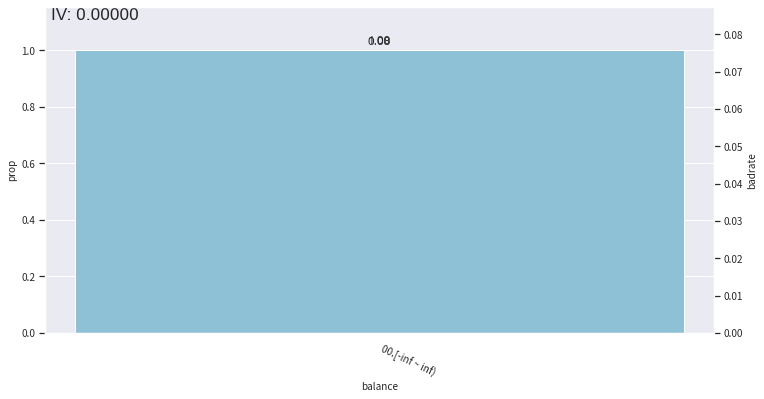

In [131]:
from toad.plot import bin_plot

# Check the bin results of 'var_d2' of in-sample
col = 'balance'

# It's recommended to set 'labels = True' for better visualisation.
bin_plot(c.transform(train_selected[[col,'status']], labels=True), x=col, target='status')

In [132]:
from toad.plot import badrate_plot

col = 'annual_inc'

# Check the stability of 'var_d2''s bins across time
#badrate_plot(c.transform(train[[col,'target','month']], labels=True), target='target', x='month', by=col)
#badrate_plot(c.transform(OOT[[col,'target','month']], labels=True), target='target', x='month', by=col)

#badrate_plot(c.transform(data[[col,'target','month']], labels=True), target='target', x='month', by=col)
'''
A feature is preferrable if the gaps between classes get wider as time goes by - it means the binned classes have larger difference. No line crossing means the bin results are stable.
'''

'\nA feature is preferrable if the gaps between classes get wider as time goes by - it means the binned classes have larger difference. No line crossing means the bin results are stable.\n'

<AxesSubplot:xlabel='balance', ylabel='prop'>

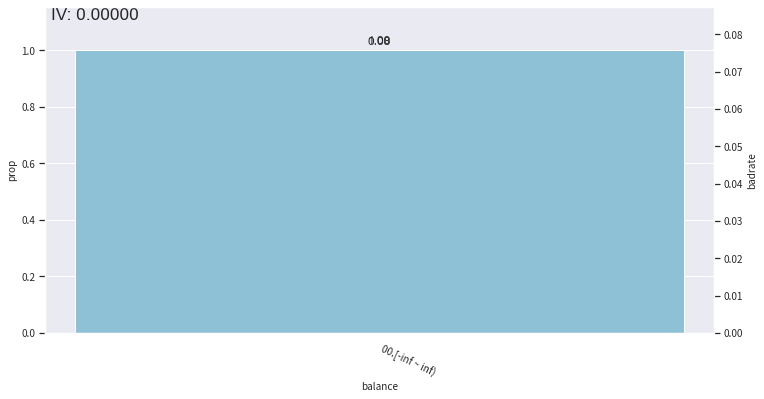

In [133]:
# Check the bin results of var_d5 of in-sample
col = 'balance'

# It's recommended to set 'labels = True' for categorical features.
bin_plot(c.transform(train_selected[[col,'status']], labels=True), x=col, target='status')

In [134]:
# Initialise
transer = toad.transform.WOETransformer()

# transer.fit_transform() & combiner.transform(). Remember to exclude target
train_woe = transer.fit_transform(c.transform(train_selected), train_selected['status'] ,exclude=['status'])
OOT_woe = transer.transform(c.transform(test))

print(train_woe.head(3))

        loan_amount  loan_duration  payments  status  trans_date  operation  \
192076     1.392634       0.091699 -3.956976       2   -0.296725  -0.158648   
189621    -1.861835      -0.551633 -3.594946       0    0.251548  -0.158648   
207785     1.392634      -0.568162  0.208423       2   -0.296725  -0.158648   

        trans_amount  balance  k_symbol   bank_to  account_to    amount  \
192076           0.0      0.0       0.0 -1.026074         0.0  0.070654   
189621           0.0      0.0       0.0  0.210305         0.0 -0.148220   
207785           0.0      0.0       0.0  0.988498         0.0  0.070654   

        district_id  frequency  account_date   disp_id  disposition_type  
192076     0.985186  -0.198573      0.072458  0.032859          0.246424  
189621    -3.744291  -0.198573     -0.203807  0.032859          0.246424  
207785    -3.744291  -0.198573      0.072458  0.032859          0.246424  


In [135]:
train_woe.head()

,loan_amount,loan_duration,payments,status,trans_date,operation,trans_amount,balance,k_symbol,bank_to,account_to,amount,district_id,frequency,account_date,disp_id,disposition_type
192076,1.392634,0.091699,-3.956976,2,-0.296725,-0.158648,0.0,0.0,0.0,-1.026074,0.0,0.070654,0.985186,-0.198573,0.072458,0.032859,0.246424
189621,-1.861835,-0.551633,-3.594946,0,0.251548,-0.158648,0.0,0.0,0.0,0.210305,0.0,-0.148220,-3.744291,-0.198573,-0.203807,0.032859,0.246424
207785,1.392634,-0.568162,0.208423,2,-0.296725,-0.158648,0.0,0.0,0.0,0.988498,0.0,0.070654,-3.744291,-0.198573,0.072458,0.032859,0.246424
312811,-2.233835,0.091699,0.208423,2,0.216201,0.332624,0.0,0.0,0.0,-0.016633,0.0,0.070654,-3.744291,-0.198573,0.417121,-0.568578,-4.015950
277836,1.392634,0.410472,-0.255059,2,0.216201,-0.158648,0.0,0.0,0.0,0.026045,0.0,0.070654,-3.744291,-0.198573,-0.411579,0.650767,0.246424


In [136]:
# Apply stepwise regression on the WOE-transformed data
final_data = toad.selection.stepwise(train_woe,target = 'status', estimator='ols', direction = 'both', criterion = 'aic')# exclude = to_drop)

#  Place the selected features to test / OOT sample
final_OOT = OOT_woe[final_data.columns]

print(final_data.shape) #  Out of 31 features, stepwise regression selected 10 of them.

(7000, 10)


In [137]:

# The final list of features for modelling
col = list(final_data.drop(['status'],axis=1).columns)

In [138]:
toad.metrics.PSI(final_data[col], final_OOT[col])

loan_amount         0.004726
loan_duration       0.002413
payments            0.001411
trans_date          0.001272
bank_to             0.004185
amount              0.000039
district_id         0.001452
account_date        0.002568
disposition_type    0.000066
dtype: float64

In [139]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(final_data[col], final_data['status'])

# Obtain predicted probability for training and OOT
pred_train = lr.predict_proba(final_data[col])[:,1]

pred_OOT = lr.predict_proba(final_OOT[col])[:,1]
#pred_OOT_june =lr.predict_proba(final_OOT.loc[final_OOT.month == '2019-06',col])[:,1]
#pred_OOT_july =lr.predict_proba(final_OOT.loc[final_OOT.month == '2019-07',col])[:,1]

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [140]:
from toad.metrics import KS, AUC

print('train KS',KS(pred_train, final_data['status']))
#print('train AUC',AUC(pred_train, final_data['status']))
print('OOT results')
print('5月 KS',KS(pred_OOT, final_OOT['status']))



train KS 0.6888561550618506
OOT results
5月 KS 0.6863234947016071


In [141]:
toad.metrics.KS_bucket(pred_train, final_data['status'], bucket=10, method = 'quantile')

,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,good_prop,...,cum_bad_rate_rev,cum_bads_prop,cum_bads_prop_rev,cum_goods_prop,cum_goods_prop_rev,cum_total_prop,cum_total_prop_rev,ks,lift,cum_lift
0,4.616249e-09,0.000013,546,154,700,0.780000,0.220000,3.545455,0.070397,-0.203704,...,1.108000,0.070397,1.000000,-0.203704,1.000000,0.100000,1.000000,0.274101,0.703971,0.703971
1,1.308135e-05,0.000112,760,-61,699,1.087268,-0.087268,-12.459016,0.097989,0.080688,...,1.144444,0.168386,0.929603,-0.123016,1.203704,0.199857,0.900000,0.291402,0.981288,0.842531
2,1.133286e-04,0.000336,608,93,701,0.867332,0.132668,6.537634,0.078391,-0.123016,...,1.151580,0.246777,0.831614,-0.246032,1.123016,0.300000,0.800143,0.492808,0.782791,0.822589
3,3.366818e-04,0.000896,782,-82,700,1.117143,-0.117143,-9.536585,0.100825,0.108466,...,1.192245,0.347602,0.753223,-0.137566,1.246032,0.400000,0.700000,0.485168,1.008252,0.869005
4,8.979027e-04,0.003241,915,-217,698,1.310888,-0.310888,-4.216590,0.117973,0.287037,...,1.204762,0.465575,0.652398,0.149471,1.137566,0.499714,0.600000,0.316104,1.183112,0.931682
5,3.245674e-03,0.012641,633,66,699,0.905579,0.094421,9.590909,0.081614,-0.087302,...,1.183609,0.547189,0.534425,0.062169,0.850529,0.599571,0.500286,0.485020,0.817310,0.912634
6,1.269580e-02,0.027901,777,-77,700,1.110000,-0.110000,-10.090909,0.100181,0.101852,...,1.252943,0.647370,0.452811,0.164021,0.937831,0.699571,0.400429,0.483349,1.001805,0.925381
7,2.798180e-02,0.049218,896,-194,702,1.276353,-0.276353,-4.618557,0.115523,0.256614,...,1.300523,0.762893,0.352630,0.420635,0.835979,0.799857,0.300429,0.342258,1.151943,0.953787
8,4.940974e-02,0.095893,953,-252,701,1.359486,-0.359486,-3.781746,0.122873,0.333333,...,1.312634,0.885766,0.237107,0.753968,0.579365,0.900000,0.200143,0.131798,1.226973,0.984184
9,9.598560e-02,0.663644,886,-186,700,1.265714,-0.265714,-4.763441,0.114234,0.246032,...,1.265714,1.000000,0.114234,1.000000,0.246032,1.000000,0.100000,0.000000,1.142341,1.000000


In [142]:
card = toad.ScoreCard(
    combiner = c,
    transer = transer,
    class_weight = 'balanced',
    C=0.1,
    base_score = 600,
    base_odds = 35 ,
    pdo = 60,
    rate = 2
)

card.fit(final_data[col], final_data['status'])

ScoreCard(base_score=600,
          combiner=<toad.transform.Combiner object at 0x00000110A5C181F0>,
          transer=<toad.transform.WOETransformer object at 0x00000110A8B470A0>)

In [143]:
model = card.fit(final_data[col], final_data['status'])
print(card.export())

{'loan_amount': {'[-inf ~ 40632)': -42.68, '[40632 ~ 48744)': -94.69, '[48744 ~ 76380)': 75.79, '[76380 ~ 97980)': -35.88, '[97980 ~ 157068)': -57.44, '[157068 ~ 232560)': 86.45, '[232560 ~ 327660)': 75.1, '[327660 ~ inf)': 174.28}, 'loan_duration': {'[-inf ~ 24)': 28.97, '[24 ~ 36)': 32.12, '[36 ~ 48)': 32.84, '[48 ~ 60)': 31.56, '[60 ~ inf)': 28.91}, 'payments': {'[-inf ~ 1354.0)': -33.53, '[1354.0 ~ 3159.0)': 34.94, '[3159.0 ~ 3931.0)': -40.05, '[3931.0 ~ 5665.0)': 37.62, '[5665.0 ~ 7041.0)': 26.6, '[7041.0 ~ inf)': 52.38}, 'trans_date': {'[-inf ~ 950601)': 24.02, '[950601 ~ 960627)': 16.69, '[960627 ~ 970308)': 14.29, '[970308 ~ 971205)': 45.52, '[971205 ~ inf)': 43.5}, 'bank_to': {'QR': 14.72, 'ST': 18.0, 'WX': 18.28, 'AB': 21.89, 'GH': 23.17, 'UV': 24.91, 'EF': 30.98, 'CD': 30.99, 'YZ': 31.52, 'IJ': 33.89, 'KL': 36.26, 'OP': 42.03, 'MN': 43.9}, 'amount': {'[-inf ~ 2482.0)': 39.11, '[2482.0 ~ inf)': 27.42}, 'district_id': {'[-inf ~ 2)': 22.75, '[2 ~ 20)': 34.73, '[20 ~ 35)': 42.88

In [144]:
# Output standard scorecard
model.export()

{'loan_amount': {'[-inf ~ 40632)': -42.68,
  '[40632 ~ 48744)': -94.69,
  '[48744 ~ 76380)': 75.79,
  '[76380 ~ 97980)': -35.88,
  '[97980 ~ 157068)': -57.44,
  '[157068 ~ 232560)': 86.45,
  '[232560 ~ 327660)': 75.1,
  '[327660 ~ inf)': 174.28},
 'loan_duration': {'[-inf ~ 24)': 28.97,
  '[24 ~ 36)': 32.12,
  '[36 ~ 48)': 32.84,
  '[48 ~ 60)': 31.56,
  '[60 ~ inf)': 28.91},
 'payments': {'[-inf ~ 1354.0)': -33.53,
  '[1354.0 ~ 3159.0)': 34.94,
  '[3159.0 ~ 3931.0)': -40.05,
  '[3931.0 ~ 5665.0)': 37.62,
  '[5665.0 ~ 7041.0)': 26.6,
  '[7041.0 ~ inf)': 52.38},
 'trans_date': {'[-inf ~ 950601)': 24.02,
  '[950601 ~ 960627)': 16.69,
  '[960627 ~ 970308)': 14.29,
  '[970308 ~ 971205)': 45.52,
  '[971205 ~ inf)': 43.5},
 'bank_to': {'QR': 14.72,
  'ST': 18.0,
  'WX': 18.28,
  'AB': 21.89,
  'GH': 23.17,
  'UV': 24.91,
  'EF': 30.98,
  'CD': 30.99,
  'YZ': 31.52,
  'IJ': 33.89,
  'KL': 36.26,
  'OP': 42.03,
  'MN': 43.9},
 'amount': {'[-inf ~ 2482.0)': 39.11, '[2482.0 ~ inf)': 27.42},
 'dis

In [145]:
model.predict(loan[:1])


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([224.07475881])

In [146]:
data.head()

,loan_date,loan_amount,loan_duration,payments,status,trans_date,trans_type,operation,trans_amount,balance,...,bank_to,account_to,amount,district_id,frequency,account_date,disp_id,disposition_type,card_type,issued_date
192076,950329,185952,48,3874.0,2,960725,VYDAJ,VYBER,29300.0,85106.4,...,ST,68287300,4625.0,34,POPLATEK MESICNE,940319,2700,OWNER,NaN,NaN
189621,950321,15420,12,1285.0,0,970810,VYDAJ,PREVOD NA UCET,1455.0,54312.2,...,IJ,63995122,1455.0,40,POPLATEK MESICNE,930523,3705,OWNER,NaN,NaN
207785,950530,158760,60,2646.0,2,970228,VYDAJ,VYBER,14.6,20410.3,...,MN,36472505,2645.5,48,POPLATEK MESICNE,930727,4377,OWNER,NaN,NaN
312811,960727,133968,48,2791.0,2,980328,PRIJEM,VKLAD,19800.0,45625.7,...,EF,28873682,9210.0,52,POPLATEK MESICNE,951109,11743,DISPONENT,NaN,NaN
277836,960304,213300,36,5925.0,2,971206,VYDAJ,PREVOD NA UCET,4794.0,25298.3,...,YZ,98242383,5925.0,47,POPLATEK MESICNE,950413,5860,OWNER,NaN,NaN


In [147]:
data.columns

Index(['loan_date', 'loan_amount', 'loan_duration', 'payments', 'status',
       'trans_date', 'trans_type', 'operation', 'trans_amount', 'balance',
       'k_symbol', 'bank', 'account', 'bank_to', 'account_to', 'amount',
       'district_id', 'frequency', 'account_date', 'disp_id',
       'disposition_type', 'card_type', 'issued_date'],
      dtype='object')

In [148]:
gbdt_transer = toad.transform.GBDTTransformer()
gbdt_transer.fit(final_data[col+['status']], 'status', n_estimators = 10, max_depth = 2)

X has feature names, but DecisionTreeRegressor was fitted without feature names


In [149]:
gbdt_vars = gbdt_transer.transform(final_data[col])

X has feature names, but DecisionTreeRegressor was fitted without feature names


In [150]:
gbdt_vars.shape

(28000, 40)

In [151]:
import pickle

In [152]:
pickle.dump(transer,open('transfer.pkl','wb'))

In [153]:
pickle.dump(model,open('model.pkl','wb'))

In [154]:
pickle_model = pickle.load(open('model.pkl','rb'))

In [155]:
pickle_model.predict(loan[:1])


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([224.07475881])